In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Part A

In [3]:
sneaker_data = pd.read_excel('2019_Winter_Data_Set.xlsx')

In [4]:
sneaker_data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

^ Checking the data types for data manipulation purposes

In [5]:
sneaker_data.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
5,6,58,882,138,1,credit_card,2017-03-14 15:25:00.986
6,7,87,915,149,1,cash,2017-03-01 21:37:57.465
7,8,22,761,292,2,cash,2017-03-08 02:05:37.981
8,9,64,914,266,2,debit,2017-03-17 20:56:50.468
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26.343


In [6]:
sneaker_data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

^ No Missing values in the data set

In [7]:
sneaker_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88eeee28d0>,
      dtype=object)

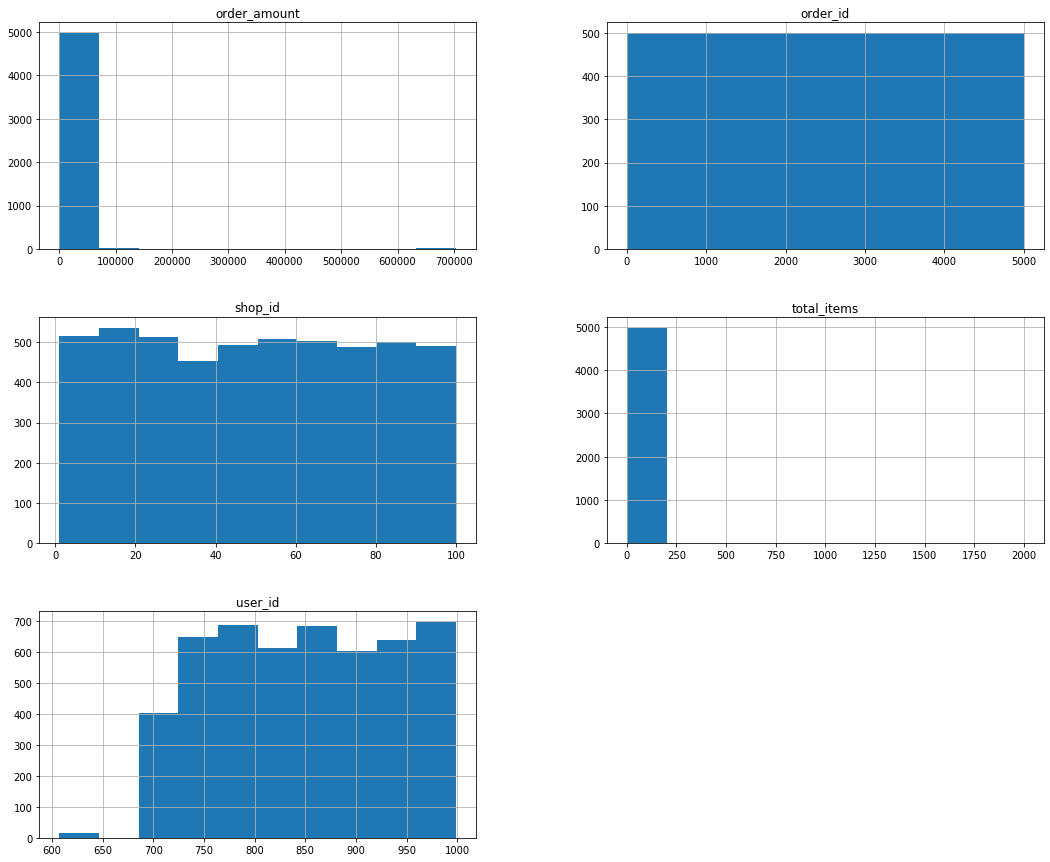

In [8]:
sneaker_data.hist(figsize=(18,15))

The Summary Table and Histogram reveal a few important points. 
- The data set contains information on 5,000 different transactions.
- shop_id: 100 different sellers are included in the data set, labeled 1-100
- user_id: User id numbers range from about 600-999
- order_amount: Smallest purchase order is \\$90; Largest purchase order is \\$704000.
- total_items: Smallest order includes 1 pair of shoes; Largest order includes 2000 pairs of shoes;
- All the transactions happened in the month of March 2017

Let's check for outliers in the total amount below

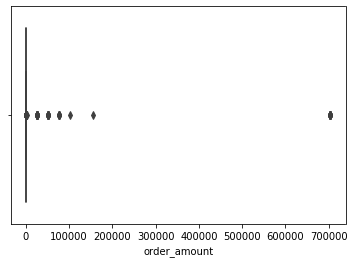

In [9]:
sns.boxplot(sneaker_data.order_amount)

In [10]:
sneaker_data[sneaker_data.order_amount > 1000].shop_id.unique()

array([42, 78, 43, 54])

These are the sellers that have individual order amounts above \$1000. Let's investigate them.

In [11]:
sneaker_data.loc[sneaker_data.shop_id == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
40,41,42,793,352,1,credit_card,2017-03-24 14:15:40.649
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
308,309,42,770,352,1,credit_card,2017-03-11 18:14:38.774
409,410,42,904,704,2,credit_card,2017-03-04 14:32:57.621
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000
834,835,42,792,352,1,cash,2017-03-25 21:31:24.596
835,836,42,819,704,2,cash,2017-03-09 14:15:15.136
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45.330
979,980,42,744,352,1,debit,2017-03-12 13:09:03.570


In [12]:
sneaker_data.loc[sneaker_data.shop_id == 42].order_amount.sum()/sneaker_data.loc[sneaker_data.shop_id == 42].total_items.sum()

352.0

^ Although the shoe price from shop_id is \\$352, The order amounts of \\$704000 are very suspicious because they are being purcahsed by credit card at 4am in the morning by user_id 607. <br/>
Check below

In [13]:
sneaker_data.loc[sneaker_data.order_amount == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [14]:
sneaker_data.loc[sneaker_data.shop_id == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843


In [15]:
sneaker_data.loc[sneaker_data.shop_id == 78].order_amount.sum()/sneaker_data.loc[sneaker_data.shop_id == 78].total_items.sum()

25725.0

^ There doesn't seem to be fraudulent activity with shop_id 78. It is just that they sell a pair of shoes for \\$25725 which is clearly an outlier; and I will not include them in the AOV calculation

In [16]:
sneaker_data.loc[sneaker_data.shop_id == 43]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
189,190,43,928,362,2,debit,2017-03-30 07:00:14.316
395,396,43,989,362,2,debit,2017-03-21 23:17:38.927
403,404,43,951,543,3,credit_card,2017-03-01 23:52:30.774
435,436,43,869,362,2,debit,2017-03-21 01:09:45.337
645,646,43,929,362,2,debit,2017-03-15 09:32:45.460
731,732,43,839,181,1,cash,2017-03-11 22:11:43.466
896,897,43,931,362,2,credit_card,2017-03-28 22:22:10.955
970,971,43,751,181,1,credit_card,2017-03-23 04:20:01.472
1109,1110,43,748,543,3,debit,2017-03-17 15:16:56.444
1172,1173,43,708,181,1,debit,2017-03-11 01:30:14.986


^ Shop_id 43 sells shoes for \\$181; nothing to worry about here.

In [17]:
sneaker_data.loc[sneaker_data.shop_id == 54]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
12,13,54,799,266,2,credit_card,2017-03-16 14:15:33.632
104,105,54,803,532,4,cash,2017-03-28 05:30:40.908
214,215,54,742,399,3,credit_card,2017-03-27 03:28:23.963
278,279,54,763,266,2,cash,2017-03-29 05:18:08.866
287,288,54,945,266,2,credit_card,2017-03-23 17:42:29.079
341,342,54,735,399,3,credit_card,2017-03-17 22:49:05.339
355,356,54,804,266,2,cash,2017-03-19 15:41:35.922
429,430,54,762,266,2,debit,2017-03-03 23:40:33.558
543,544,54,986,266,2,credit_card,2017-03-30 06:07:38.731
674,675,54,771,133,1,credit_card,2017-03-19 07:16:45.262


^ Shop_id 43 sells shoes for \\$133; nothing to worry about here.

### Part B & C

Below: Let's calculate the Average Order Value once we remove what seems to be the strange purchases done by user_id 607 and the outlier prices of shop_id 78.

In [18]:
sneaker_data1 = sneaker_data.loc[sneaker_data.user_id != 607]
sneaker_data1 = sneaker_data1.loc[sneaker_data.shop_id != 78]

In [19]:
sneaker_data1.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


After removing the suspiscious outliers. We now calculate an average order amount of \\$302.58 .

Calculating how much shoe sellers sold on average in the month of March 2017

In [20]:
sneaker_data1.groupby('shop_id').order_amount.sum().mean()

15089.29292929293

Caluclating how much shoe sellers on Shopify sold in total in the month of March

In [21]:
sneaker_data1.groupby('shop_id').order_amount.sum().sum()

1493840

Let's try to do some research into the Top 10 sellers and Bottom 10 sellers and see if we can learn what makes their selling success different

Text(0, 0.5, 'Frequency')

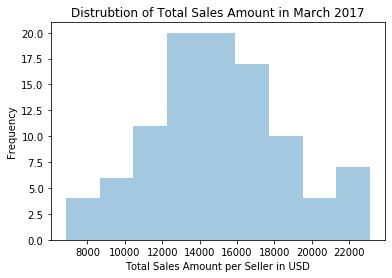

In [22]:
sns.distplot(sneaker_data1.groupby('shop_id').order_amount.sum(), kde=False)
plt.title('Distrubtion of Total Sales Amount in March 2017')
plt.xlabel('Total Sales Amount per Seller in USD')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total Sales in USD')

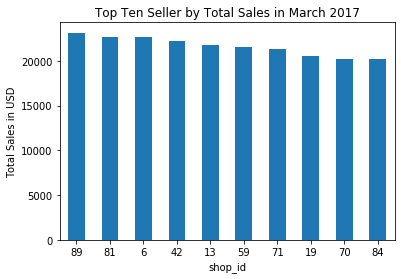

In [23]:
sneaker_data1.groupby('shop_id').order_amount.sum().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Top Ten Seller by Total Sales in March 2017')
plt.xticks(rotation=0)
plt.ylabel('Total Sales in USD')

Text(0, 0.5, 'Total Sales in USD')

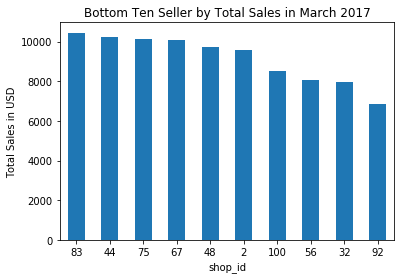

In [24]:
sneaker_data1.groupby('shop_id').order_amount.sum().sort_values(ascending = False).tail(10).plot(kind='bar')
plt.title('Bottom Ten Seller by Total Sales in March 2017')
plt.xticks(rotation=0)
plt.ylabel('Total Sales in USD')